In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [132]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [133]:
df.count()

Unnamed: 0              2223
ID                      2223
Year_Birth              2223
Education               2223
Marital_Status          2223
Income                  2223
Kidhome                 2223
Teenhome                2223
Dt_Customer             2223
Recency                 2223
MntWines                2223
MntFruits               2223
MntMeatProducts         2223
MntFishProducts         2223
MntSweetProducts        2223
MntGoldProds            2223
NumDealsPurchases       2223
NumWebPurchases         2223
NumCatalogPurchases     2223
NumStorePurchases       2223
NumWebVisitsMonth       2223
Response                2223
Complain                2223
Age                     2223
Total_Spent             2223
BuyingPower             2202
HouseHoldMembers        2223
Total_Children          2223
TotalPurchases          2223
Dt_CustomerConverted    2223
SinceEnrolled           2223
CLV                     2223
AOV                     2223
dtype: int64

In [134]:
df.dropna(inplace=True)

In [135]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [136]:
# data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'Complain', 'Total_Spent']]

data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'CLV', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'AOV']]
data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [137]:
data.count()

Income                 2202
Kidhome                2202
Teenhome               2202
Marital_Status         2202
Education              2202
Response               2202
Recency                2202
TotalPurchases         2202
Complain               2202
NumWebVisitsMonth      2202
Age                    2202
CLV                    2202
NumDealsPurchases      2202
NumWebPurchases        2202
NumCatalogPurchases    2202
NumStorePurchases      2202
AOV                    2202
dtype: int64

In [138]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [139]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [140]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [141]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [142]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [143]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [144]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8790
Precision: 0.8065
Recall: 0.2525
F1: 0.3846
AUC: 0.6209


In [145]:
print(len(preds))

661


# Figures

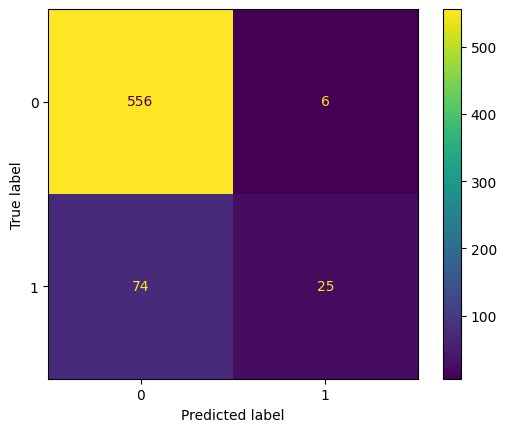

In [146]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
# Normalize the confusion matrix to get probabilities
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packag

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packag

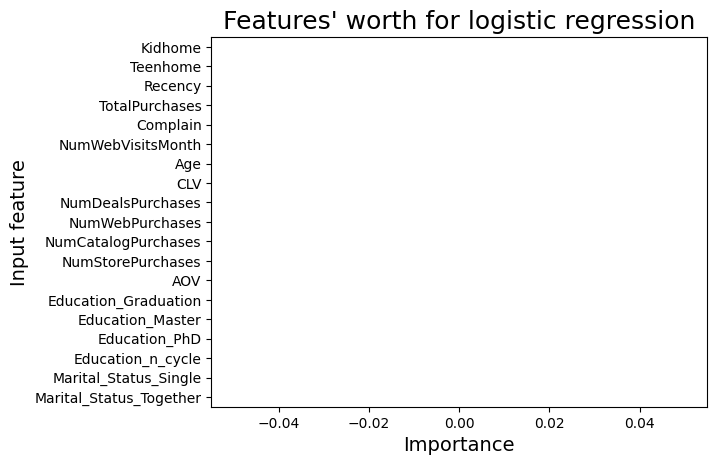

Marital_Status_Together: 0.0
NumDealsPurchases: 0.0
Teenhome: 0.0
Recency: 0.0
TotalPurchases: 0.0
Complain: 0.0
NumWebVisitsMonth: 0.0
Age: 0.0
CLV: 0.0
NumWebPurchases: 0.0
Marital_Status_Single: 0.0
NumCatalogPurchases: 0.0
NumStorePurchases: 0.0
AOV: 0.0
Education_Graduation: 0.0
Education_Master: 0.0
Education_PhD: 0.0
Education_n_cycle: 0.0
Kidhome: 0.0


In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), X.columns)
#     ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for SVM", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")